In [1]:
import sys
sys.path.append('C:/Users/lisah/Documents/Repos/ma-code')
from src.plots_ll_fish import *

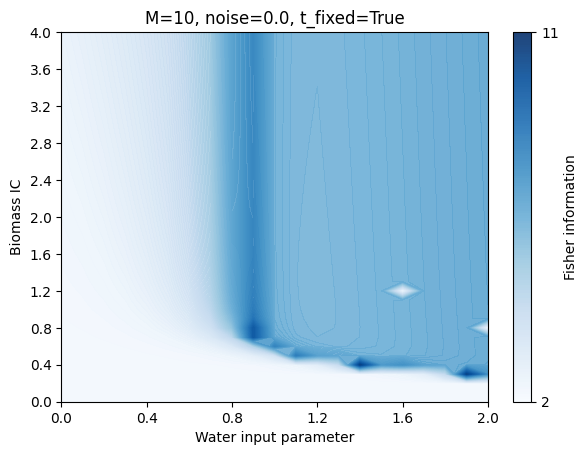

In [7]:
# Plots of the Fisher information of inferred a,m parameters
M_vals = [10]
noise_vals = [0.0]
w0=0.95
m=0.45
store=False
t_fixed=True
log=True

path_to_read= "C:/Users/lisah/Documents/Repos/ma-code/data/t_fixed/t50/fisher_am/"
path_to_store=""

make_all_fish_plots(M_vals, noise_vals,w0, m, path_to_read,path_to_store, t_fixed, store, log)

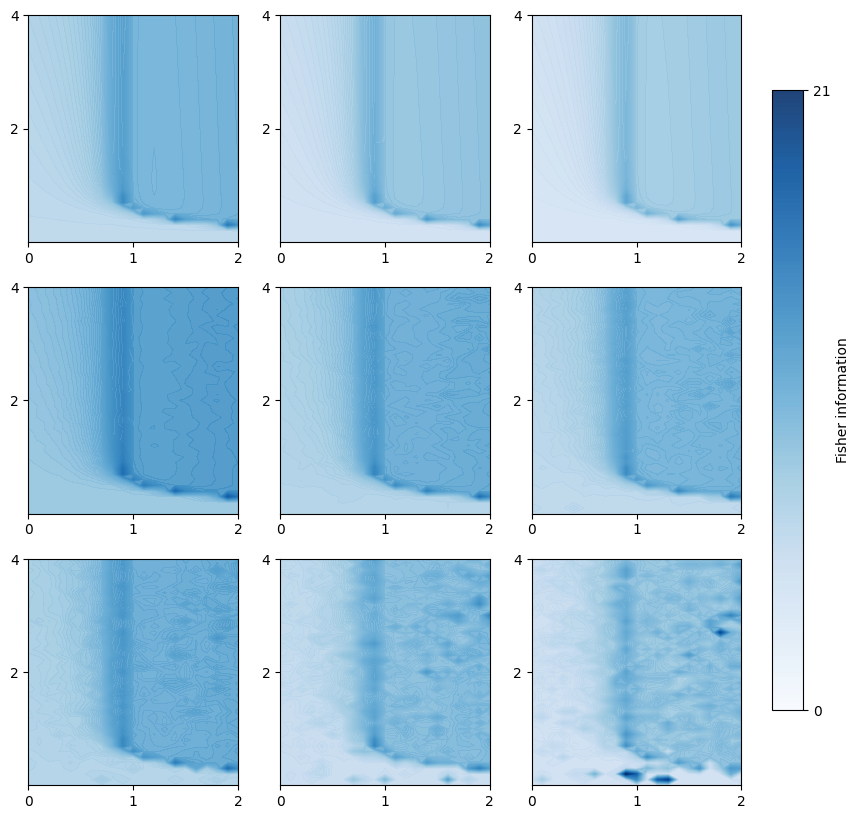

In [17]:
M_vals = [500, 100, 50]
noise_vals = [0.0, 0.1, 0.5]
w0=0.95
m=0.45
store=False
t_fixed=True
log=True

path_to_read= "C:/Users/lisah/Documents/Repos/ma-code/data/t_fixed/t50/fisher_am/"
fish_grid_plot(noise_vals, M_vals, path_to_read, w0, m, log)